In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import scipy
import pandas as pd

from IPython import display
from petro_res_pack import Properties, PetroEnv, ResState, Session

In [2]:
nx = 25
ny = 25
k = 1e-1 * 9.87e-13  # 1 darcy to m^2
dx = 3 # m
dy = 3 # m
phi = 0.4
p_0 = 150 * 10 ** 5  # psi to Pa
d = 30  # m
dt = 40316.  # s
s_0 = 0.375
s_b = 0.1
p = np.ones((nx*ny, 1)) * p_0
s_o = np.ones((nx*ny, 1)) * s_0
s_w = np.ones((nx*ny, 1))* (1 - s_0)

In [3]:
c_w = 1e-6 # # Pa^-1
c_o = 1e-6 # # Pa^-1
c_r = 3e-6 #  Pa^-1 

In [4]:
B_o = 1
B_w = 1
mu_o = 15 / 1000 # cp to Pa * s
mu_w = 1 / 1000 # cp to Pa * s

In [5]:
l_w = 2.
l_o = 2.
s_wir = 0.2
s_wor = 0.8
k_rwr = 0.1
k_rot = 1.
e_w = 1.
e_o = 1.
t_w = 2.
t_o = 2.

In [6]:
1 / (1/ dx + np.pi / d)

2.2828283291679354

In [7]:
prop = Properties(nx=nx, ny=ny, k=k, dx=dx, dy=dy, phi=phi, p_0=p_0, d=d, dt=dt, s_0=s_0,
                 c_w=c_w, c_o=c_w, c_r=c_r, mu_w=mu_w, mu_o=mu_o, b_o=B_o, b_w=B_w, l_w=l_w, l_o=l_o,
                 s_wir=s_wir, s_wor=s_wor, k_rwr=k_rwr, k_rot=k_rot, e_w=e_w, e_o=e_o, t_w=t_w, t_o=t_o)

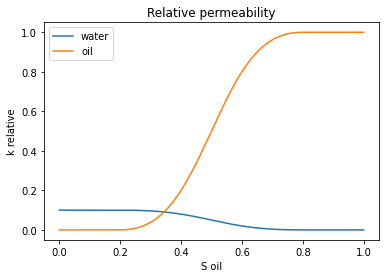

In [8]:
ss = np.linspace(0, 1, 200)
k_rels_w = [prop.k_rel_by_ph(1-s, 'w') for s in ss]
k_rels_o = [prop.k_rel_by_ph(s, 'o') for s in ss]
plt.plot(ss, k_rels_w, label='water')
plt.plot(ss, k_rels_o, label='oil')
plt.xlabel('S oil')
plt.ylabel("k relative")
plt.title('Relative permeability')
plt.legend()
plt.show()

In [9]:
p = ResState(p, p_0, prop)
s_o = ResState(s_o, s_b, prop)
s_w = ResState(s_w, 1 - s_b, prop)

In [10]:
pos_r = {(8, 8): 0.1, (18, 21): 0.1}
delta_p_well = -100 * 6894.
delta_p_vec = np.ones((nx*ny, 1)) * delta_p_well

In [11]:
n_iter = int(5e3)
p_ex = np.ones((nx, 1)) * p_0
t = 0
xs = list((np.linspace(0, nx-1, nx) + dx/2) * dx)
plot_freq = int(5)
times = []
p_well_hist = {}
s_o_well_hist = {}
q_o_hist = {}
q_w_hist = {}
for w in pos_r:
    p_well_hist[w] = []
    s_o_well_hist[w] = []
    q_o_hist[w] = []
    q_w_hist[w] = []

In [12]:
env = PetroEnv(p=p, s_o=s_o, s_w=s_w, prop=prop, pos_r=pos_r, delta_p_well=delta_p_well, max_time=600)

In [13]:
_ = env.reset()
for _ in range(100):
    _, reward, _, _ = env.step()

act = [0.3, 0.3]
expe_rew = env.evaluate_action(act)
_, true_rew, _, _ = env.step(act)

assert expe_rew == true_rew

_, _, _, _ = env.step([0.9, 0.9])

act = [0., 0.]
expe_rew = env.evaluate_action(act)
_, true_rew, _, _ = env.step(act)

assert expe_rew == true_rew

_, _, _, _ = env.step([0.7, 0.7])
act = [7., 0.]
expe_rew = env.evaluate_action(act)
_, true_rew, _, _ = env.step(act)

assert expe_rew == true_rew

_, _, _, _ = env.step([0., 0.])

expe_rew = env.evaluate_action([0., 0.])
_, true_rew, _, _ = env.step([0., 0.])

assert expe_rew == true_rew

KeyboardInterrupt: 

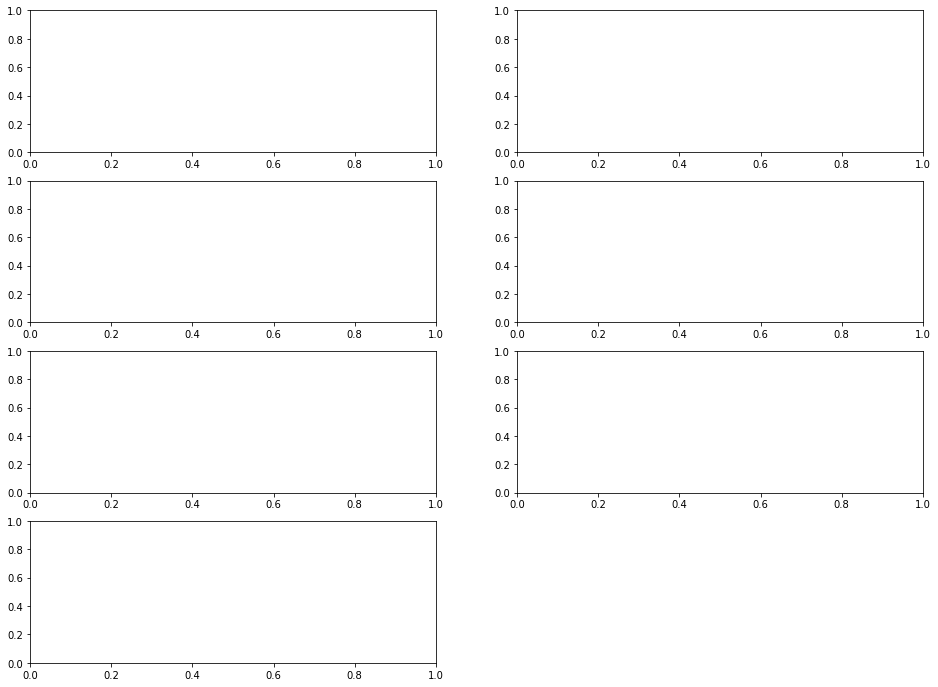

In [14]:
env.reset()
sesion = Session(env, n_iter=int(1e6), plot_freq=50)
sesion.run()

In [25]:
from petro_res_pack.sub_matrices_utils import get_sub_matrix

In [23]:
x = np.array(range(3*4)).reshape(3, 4)
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [32]:
get_sub_matrix(x, 3, center=(-1, 0), pad_value=-1)

array([], shape=(0, 3), dtype=int32)